<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maturation-over-long-time-scale" data-toc-modified-id="Maturation-over-long-time-scale-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Maturation over long time scale</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>High Resources</a></span><ul class="toc-item"><li><span><a href="#1-meta_exp" data-toc-modified-id="1-meta_exp-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1 meta_exp</a></span></li><li><span><a href="#0.75" data-toc-modified-id="0.75-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>0.75</a></span></li></ul></li></ul></li><li><span><a href="#Maturation-over-Short-Time-Scale" data-toc-modified-id="Maturation-over-Short-Time-Scale-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maturation over Short Time Scale</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>High Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75" data-toc-modified-id="0.75-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>0.75</a></span></li></ul></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Low Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75-meta_exp" data-toc-modified-id="0.75-meta_exp-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>0.75 meta_exp</a></span></li></ul></li><li><span><a href="#Very-Low-Resources" data-toc-modified-id="Very-Low-Resources-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Very Low Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75" data-toc-modified-id="0.75-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>0.75</a></span></li></ul></li></ul></li><li><span><a href="#Metabolic-Exponent" data-toc-modified-id="Metabolic-Exponent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metabolic Exponent</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>High Resources</a></span></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Low Resources</a></span></li><li><span><a href="#Very-Low-Resources" data-toc-modified-id="Very-Low-Resources-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Very Low Resources</a></span></li></ul></li><li><span><a href="#Resource-Density" data-toc-modified-id="Resource-Density-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Resource Density</a></span><ul class="toc-item"><li><span><a href="#1-Metabolic-Exponent" data-toc-modified-id="1-Metabolic-Exponent-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1 Metabolic Exponent</a></span></li><li><span><a href="#0.75-Metabolic-Exponent" data-toc-modified-id="0.75-Metabolic-Exponent-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>0.75 Metabolic Exponent</a></span></li><li><span><a href="#Fine-scale-resources" data-toc-modified-id="Fine-scale-resources-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fine scale resources</a></span><ul class="toc-item"><li><span><a href="#1-meta_exp" data-toc-modified-id="1-meta_exp-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>1 meta_exp</a></span></li><li><span><a href="#0.75-meta_exp" data-toc-modified-id="0.75-meta_exp-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>0.75 meta_exp</a></span></li></ul></li></ul></li><li><span><a href="#Shrinkage" data-toc-modified-id="Shrinkage-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Shrinkage</a></span><ul class="toc-item"><li><span><a href="#High-Resources" data-toc-modified-id="High-Resources-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>High Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75" data-toc-modified-id="0.75-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>0.75</a></span></li></ul></li><li><span><a href="#Low-Resources" data-toc-modified-id="Low-Resources-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Low Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75-meta_exp" data-toc-modified-id="0.75-meta_exp-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>0.75 meta_exp</a></span></li></ul></li><li><span><a href="#Very-Low-Resources" data-toc-modified-id="Very-Low-Resources-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Very Low Resources</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#0.75" data-toc-modified-id="0.75-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>0.75</a></span></li></ul></li></ul></li><li><span><a href="#Other-graphs" data-toc-modified-id="Other-graphs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Other graphs</a></span><ul class="toc-item"><li><span><a href="#log-space-scaling" data-toc-modified-id="log-space-scaling-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>log space scaling</a></span></li></ul></li></ul></div>

Plots the results of report_plots.py 

In [1]:
## Imports
from numpy import around, array, arange, linspace
import matplotlib.pyplot as plt
from string import ascii_lowercase
import pandas as pd
import seaborn as sb
sb.set(style="whitegrid")

In [2]:
## paper sizes
a4_sheet = array([8.3, 11.7]) # in inches
a4_width = a4_sheet[0]
a4_heigth = a4_sheet[1]
a4_box = array([8.3, 8.3])
titlefont = 30
labelfont = 15


In [3]:
## Functions
def make_file_list(directory, parameters, dimensions, prefix = None):
    """
    directory (str) : directory where the files are held.
    parameters (list) : The name of the parameter(s) to be read in, each as a string.
    dimensions (list) : The dimensions of the parameters, each as string.
    prefix (string) : A tag onto the filename to differentiate runs. Defaults to `None`
    
    returns:
        (list) : The file names for the parameter in the dimensions as a list of strings. 
    """

        
    file_list = []
    for dim in dimensions:
        for param in parameters: # in case i wish to have >1 parameter
            if prefix == None:
                file_name = f"{directory}sensitivity{param}{dim}.csv"
            else:
                file_name = f"{directory}sensitivity{prefix}{param}{dim}.csv"
            file_list.append(file_name)
    return file_list

def plot_file_list(file_list, x_label):
    
    fig=plt.figure(figsize=(a4_width*1.3, a4_width*0.6))
    for i, param in enumerate(["c", "rho"],1):
        ax = plt.subplot(1,2,i)
        for j, file_name in enumerate(file_list):
#             plt.text(0.02, 0.5, textstr, fontsize=14, transform=plt.gcf().transFigure)
            plt.text(0.07+(i-1)*0.43, 0.92, f"{list(ascii_lowercase)[i-1]})",  
                     transform=fig.transFigure, fontsize=15)
            file = pd.read_csv(file_name)
            x_key = file.columns[2]
            x_vals = file[x_key]
            y_vals = file[param]
            plt.plot(x_vals, y_vals, label = dimensions[j])
#             plt.xlabel(x_label)
            if param == "rho":
                y_label = "$\\rho$"
            else:
                y_label = "$c$"
            plt.ylabel(y_label, fontsize=15)
            plt.legend()
    fig.add_subplot(111, frameon=False)
    plt.grid(False)
    plt.tick_params(labelcolor="none")
    plt.xlabel(x_label, fontsize=15)
    return 0 

def show_data(file_list):
    """
    Displays all the data in a list of .csv files.
    """
    for file in file_list:
        print(file)
        display(pd.read_csv(file))
    return 0

In [4]:
dimensions = ["2D", "3D"]
directory = "../results/"
tmp_directory = "../results/tmp_low_res_sens/"
## filename prefixes
HighRes1 = "HighResources_BothDims_metaexp1"
HighRes075 = "HighResources_BothDims_metaexp075"

LowResBoth1 = "LowResources_BothDims_metaexp1"
LowResBoth075 = "LowResources_BothDims_metaexp075"

LowRes3D1 = "LowResources_3D_metaexp1"
LowRes3D075 = "LowResources_3D_metaexp075"

LowRes2D1 = "LowResources_2D_metaexp1"
LowRes2D075 = "LowResources_2D_metaexp075"

# Maturation over long time scale

## High Resources

### 1 meta_exp

0

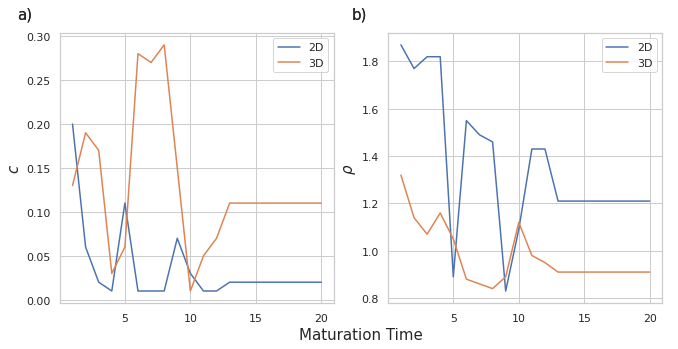

In [5]:
file_list = make_file_list(directory, ["alpha"], dimensions, HighRes1)
plot_file_list(file_list, "Maturation Time")
# plt.savefig("../results/Sens_Maturation_Time_Long_exp1.pdf")

In [6]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp1alpha2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp1alpha3D.csv']

### 0.75

0

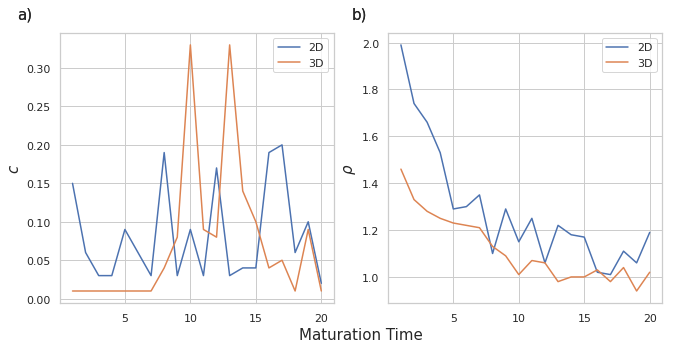

In [7]:
file_list = make_file_list(directory, ["alpha"], dimensions, HighRes075)
plot_file_list(file_list, "Maturation Time")
# plt.savefig("../results/Sens_Maturation_Time_Long_exp075.pdf")

In [8]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp075alpha2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp075alpha3D.csv']

In [9]:
show_data(file_list)

../results/sensitivityHighResources_BothDims_metaexp075alpha2D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.15,1.99,1,100,0.75
1,0.06,1.74,2,100,0.75
2,0.03,1.66,3,100,0.75
3,0.03,1.53,4,100,0.75
4,0.09,1.29,5,100,0.75
5,0.06,1.30,6,100,0.75
6,0.03,1.35,7,100,0.75
7,0.19,1.10,8,100,0.75
8,0.03,1.29,9,100,0.75
9,0.09,1.15,10,100,0.75


../results/sensitivityHighResources_BothDims_metaexp075alpha3D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.01,1.46,1,100,0.75
1,0.01,1.33,2,100,0.75
2,0.01,1.28,3,100,0.75
3,0.01,1.25,4,100,0.75
4,0.01,1.23,5,100,0.75
5,0.01,1.22,6,100,0.75
6,0.01,1.21,7,100,0.75
7,0.04,1.13,8,100,0.75
8,0.08,1.09,9,100,0.75
9,0.33,1.01,10,100,0.75


0

# Maturation over Short Time Scale

## High Resources

### 1

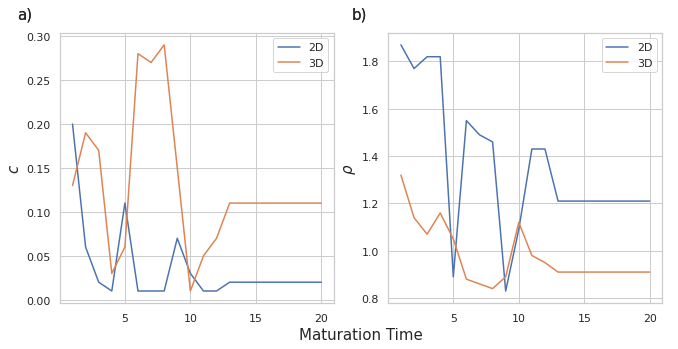

In [10]:
file_list = make_file_list(directory, ["alpha"], dimensions, HighRes1)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_High_Resources_Maturation_Time_short_exp1.pdf")

In [11]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp1alpha2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp1alpha3D.csv']

### 0.75

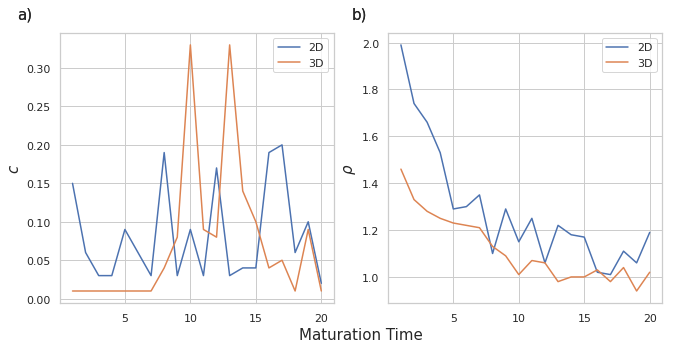

In [12]:
file_list = make_file_list(directory, ["alpha"], dimensions, HighRes075)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_High_Resources_Maturation_Time_short_exp075.pdf")

In [13]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp075alpha2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp075alpha3D.csv']

## Low Resources

### 1

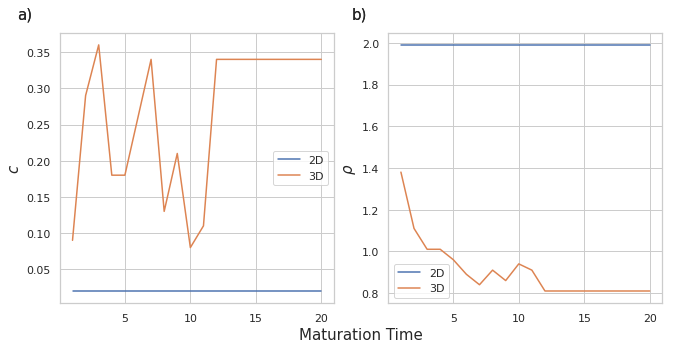

In [14]:
file_list = make_file_list(directory, ["alpha"], dimensions, LowResBoth1)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Low_Resources_Maturation_Time_short_exp1.pdf")

In [15]:
file_list

['../results/sensitivityLowResources_BothDims_metaexp1alpha2D.csv',
 '../results/sensitivityLowResources_BothDims_metaexp1alpha3D.csv']

In [16]:
show_data(file_list)

../results/sensitivityLowResources_BothDims_metaexp1alpha2D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.02,1.99,1,0.11,1
1,0.02,1.99,2,0.11,1
2,0.02,1.99,3,0.11,1
3,0.02,1.99,4,0.11,1
4,0.02,1.99,5,0.11,1
5,0.02,1.99,6,0.11,1
6,0.02,1.99,7,0.11,1
7,0.02,1.99,8,0.11,1
8,0.02,1.99,9,0.11,1
9,0.02,1.99,10,0.11,1


../results/sensitivityLowResources_BothDims_metaexp1alpha3D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.09,1.38,1,0.11,1
1,0.29,1.11,2,0.11,1
2,0.36,1.01,3,0.11,1
3,0.18,1.01,4,0.11,1
4,0.18,0.96,5,0.11,1
5,0.26,0.89,6,0.11,1
6,0.34,0.84,7,0.11,1
7,0.13,0.91,8,0.11,1
8,0.21,0.86,9,0.11,1
9,0.08,0.94,10,0.11,1


0

### 0.75 meta_exp 

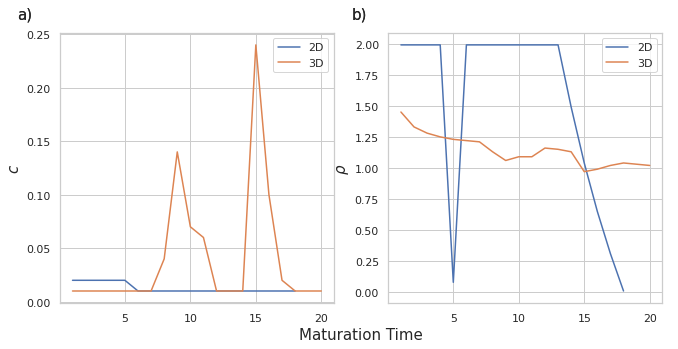

In [17]:
file_list = make_file_list(directory, ["alpha"], dimensions, LowResBoth075)
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Low_Resources_Maturation_Time_short_exp075.pdf")

In [18]:
file_list

['../results/sensitivityLowResources_BothDims_metaexp075alpha2D.csv',
 '../results/sensitivityLowResources_BothDims_metaexp075alpha3D.csv']

In [19]:
show_data(file_list)

../results/sensitivityLowResources_BothDims_metaexp075alpha2D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.02,1.99,1,0.11,0.75
1,0.02,1.99,2,0.11,0.75
2,0.02,1.99,3,0.11,0.75
3,0.02,1.99,4,0.11,0.75
4,0.02,0.08,5,0.11,0.75
5,0.01,1.99,6,0.11,0.75
6,0.01,1.99,7,0.11,0.75
7,0.01,1.99,8,0.11,0.75
8,0.01,1.99,9,0.11,0.75
9,0.01,1.99,10,0.11,0.75


../results/sensitivityLowResources_BothDims_metaexp075alpha3D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.01,1.45,1,0.11,0.75
1,0.01,1.33,2,0.11,0.75
2,0.01,1.28,3,0.11,0.75
3,0.01,1.25,4,0.11,0.75
4,0.01,1.23,5,0.11,0.75
5,0.01,1.22,6,0.11,0.75
6,0.01,1.21,7,0.11,0.75
7,0.04,1.13,8,0.11,0.75
8,0.14,1.06,9,0.11,0.75
9,0.07,1.09,10,0.11,0.75


0

## Very Low Resources

### 1

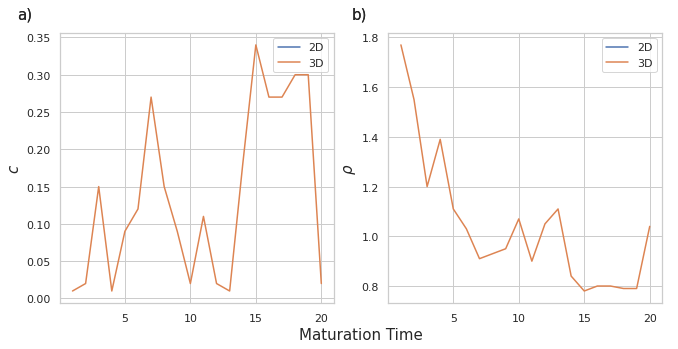

In [20]:
file_list = make_file_list(directory, ["alpha"], ["2D"], LowRes2D1)
file_list.append(make_file_list(directory, ["alpha"], ["3D"], LowRes3D1)[0])
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Very_Low_Resources_Maturation_Time_short_exp1.pdf")

In [21]:
file_list

['../results/sensitivityLowResources_2D_metaexp1alpha2D.csv',
 '../results/sensitivityLowResources_3D_metaexp1alpha3D.csv']

### 0.75

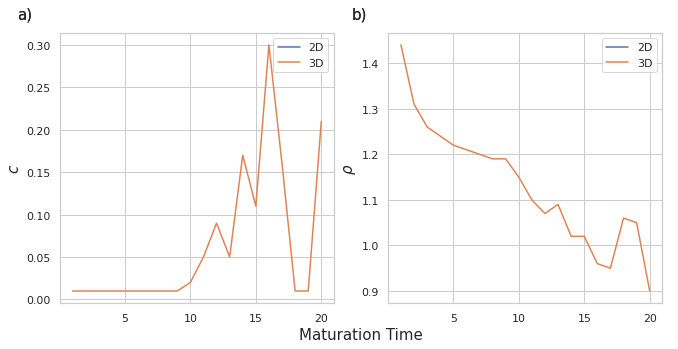

In [22]:
file_list = make_file_list(directory, ["alpha"], ["2D"], LowRes2D075)
file_list.append(make_file_list(directory, ["alpha"], ["3D"], LowRes3D075)[0])
plot_file_list(file_list, "Maturation Time")
plt.savefig("../results/Sens_Very_Low_Resources_Maturation_Time_short_exp075.pdf")

In [23]:
file_list

['../results/sensitivityLowResources_2D_metaexp075alpha2D.csv',
 '../results/sensitivityLowResources_3D_metaexp075alpha3D.csv']

In [24]:
show_data(file_list)

../results/sensitivityLowResources_2D_metaexp075alpha2D.csv


,c,rho,alpha,Xr,metabolic exponent


../results/sensitivityLowResources_3D_metaexp075alpha3D.csv


,c,rho,alpha,Xr,metabolic exponent
0,0.01,1.44,1,0.01,0.75
1,0.01,1.31,2,0.01,0.75
2,0.01,1.26,3,0.01,0.75
3,0.01,1.24,4,0.01,0.75
4,0.01,1.22,5,0.01,0.75
5,0.01,1.21,6,0.01,0.75
6,0.01,1.20,7,0.01,0.75
7,0.01,1.19,8,0.01,0.75
8,0.01,1.19,9,0.01,0.75
9,0.02,1.15,10,0.01,0.75


0

# Metabolic Exponent

## High Resources

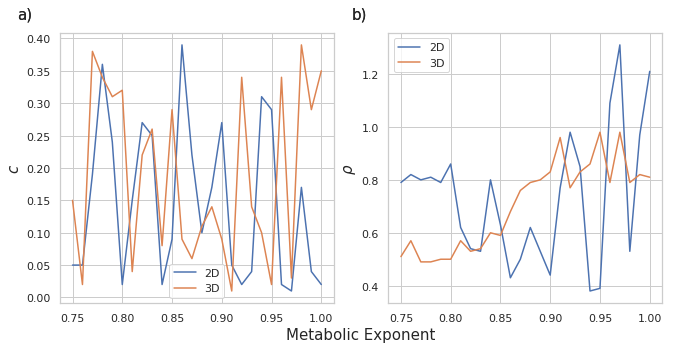

In [25]:
file_list = make_file_list(directory, ["meta_exp"], dimensions, HighRes1)
plot_file_list(file_list, "Metabolic Exponent")
plt.savefig("../results/Sens_High_Resources_Metabolic_Exponent.pdf")

In [26]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp1meta_exp2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp1meta_exp3D.csv']

## Low Resources

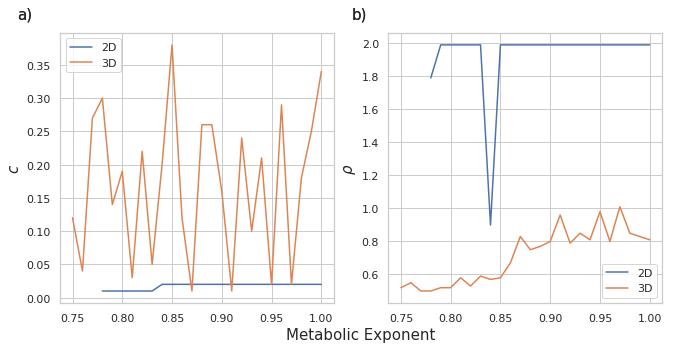

In [27]:
file_list = make_file_list(directory, ["meta_exp"], dimensions, LowResBoth1)
plot_file_list(file_list, "Metabolic Exponent")
plt.savefig("../results/Sens_Low_Resources_Metabolic_Exponent.pdf")

In [28]:
file_list

['../results/sensitivityLowResources_BothDims_metaexp1meta_exp2D.csv',
 '../results/sensitivityLowResources_BothDims_metaexp1meta_exp3D.csv']

## Very Low Resources

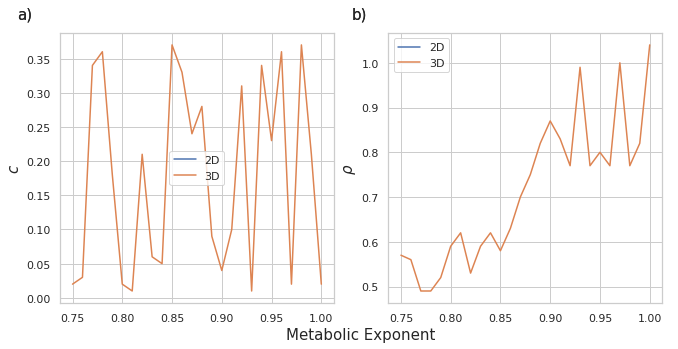

In [29]:
file_list = make_file_list(directory, ["meta_exp"], ["2D"], LowRes2D075)
file_list.append(make_file_list(directory, ["meta_exp"], ["3D"], LowRes3D1)[0])
plot_file_list(file_list, "Metabolic Exponent")
plt.savefig("../results/Sens_Very_Low_Resources_Metabolic_Exponent.pdf")

In [30]:
file_list

['../results/sensitivityLowResources_2D_metaexp075meta_exp2D.csv',
 '../results/sensitivityLowResources_3D_metaexp1meta_exp3D.csv']

Notes:
- could try with more data points to smooth out the tail end.

# Resource Density

## 1 Metabolic Exponent

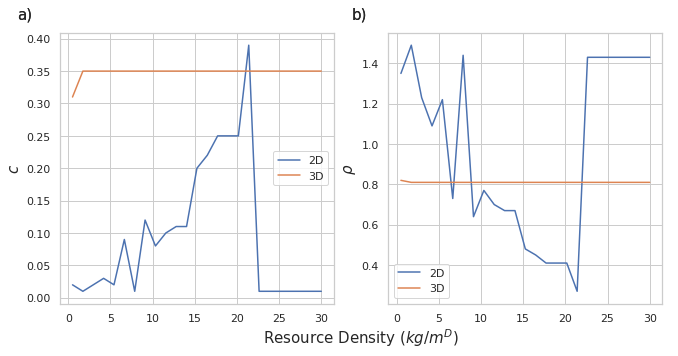

In [31]:
file_list = make_file_list(directory, ["Xr"], dimensions, HighRes1)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Resource_Density_exp1_broad.pdf")

In [32]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp1Xr2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp1Xr3D.csv']

In [33]:
# show_data(file_list)

## 0.75 Metabolic Exponent

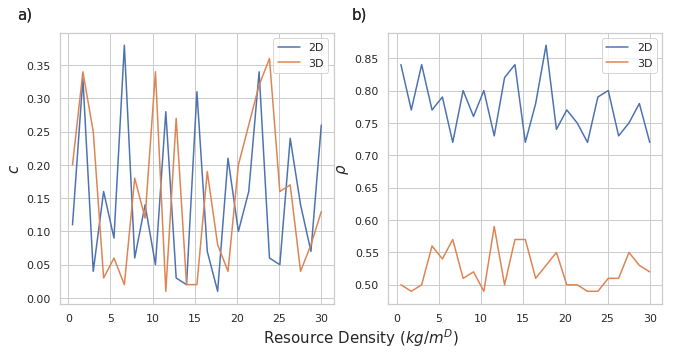

In [34]:
file_list = make_file_list(directory, ["Xr"], dimensions, HighRes075)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Resource_Density_exp075_broad.pdf")

In [35]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp075Xr2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp075Xr3D.csv']

In [36]:
# show_data(file_list)

In [37]:
# show_data(file_list)

## Fine scale resources

### 1 meta_exp

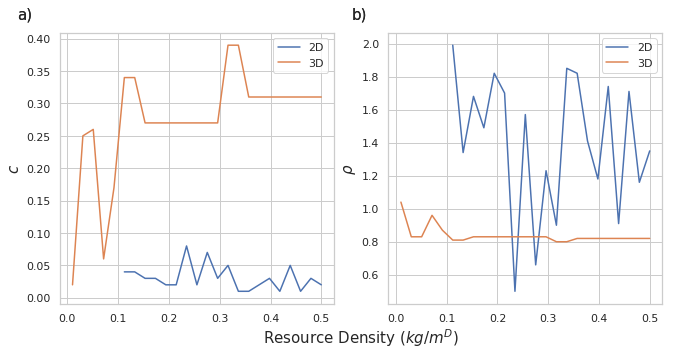

In [38]:
file_list = make_file_list(directory, ["Xr"], dimensions, LowResBoth1)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Resource_Density_exp1_fine.pdf")

### 0.75 meta_exp 

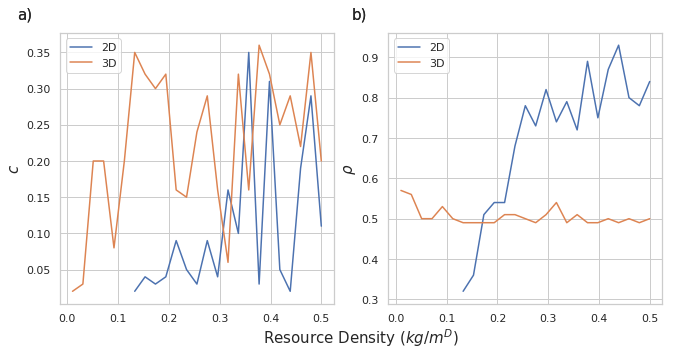

In [39]:
file_list = make_file_list(directory, ["Xr"], dimensions, LowResBoth075)
plot_file_list(file_list, "Resource Density ($kg/m^D$)")
plt.savefig("../results/Sens_Resource_Density_exp075_fine.pdf")

In [40]:
file_list

['../results/sensitivityLowResources_BothDims_metaexp075Xr2D.csv',
 '../results/sensitivityLowResources_BothDims_metaexp075Xr3D.csv']

In [41]:
show_data(file_list)

../results/sensitivityLowResources_BothDims_metaexp075Xr2D.csv


,c,rho,Xr,Xr.1,metabolic exponent
0,NaN,NaN,0.010000,0.5,0.75
1,NaN,NaN,0.030417,0.5,0.75
2,NaN,NaN,0.050833,0.5,0.75
3,NaN,NaN,0.071250,0.5,0.75
4,NaN,NaN,0.091667,0.5,0.75
5,NaN,NaN,0.112083,0.5,0.75
6,0.02,0.32,0.132500,0.5,0.75
7,0.04,0.36,0.152917,0.5,0.75
8,0.03,0.51,0.173333,0.5,0.75
9,0.04,0.54,0.193750,0.5,0.75


../results/sensitivityLowResources_BothDims_metaexp075Xr3D.csv


,c,rho,Xr,Xr.1,metabolic exponent
0,0.02,0.57,0.010000,0.5,0.75
1,0.03,0.56,0.030417,0.5,0.75
2,0.20,0.50,0.050833,0.5,0.75
3,0.20,0.50,0.071250,0.5,0.75
4,0.08,0.53,0.091667,0.5,0.75
5,0.20,0.50,0.112083,0.5,0.75
6,0.35,0.49,0.132500,0.5,0.75
7,0.32,0.49,0.152917,0.5,0.75
8,0.30,0.49,0.173333,0.5,0.75
9,0.32,0.49,0.193750,0.5,0.75


0

# Shrinkage

## High Resources

### 1

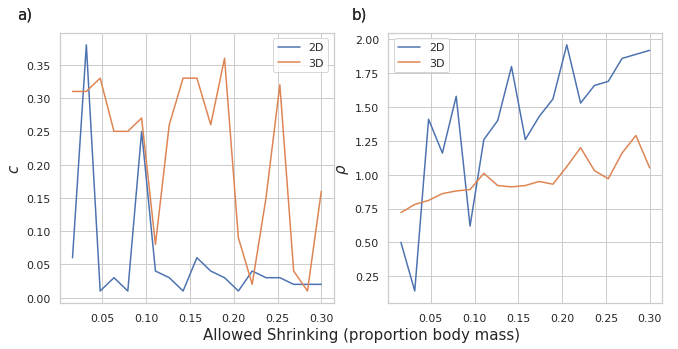

In [42]:
file_list = make_file_list(directory, ["shrinkage"], dimensions, HighRes1)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_HighResources_Shrink_exp1.pdf")

In [43]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp1shrinkage2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp1shrinkage3D.csv']

### 0.75

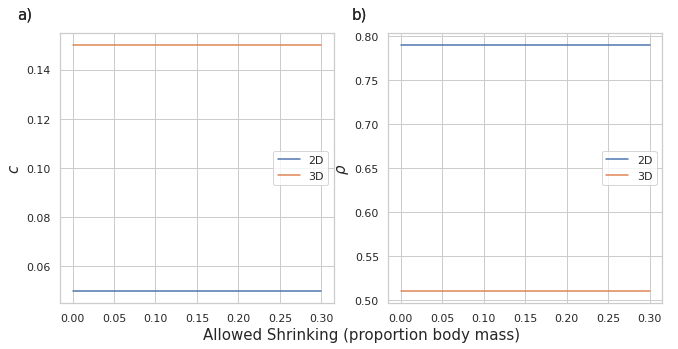

In [44]:
file_list = make_file_list(directory, ["shrinkage"], dimensions, HighRes075)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_HighResources_Shrink_exp075.pdf")

In [45]:
file_list

['../results/sensitivityHighResources_BothDims_metaexp075shrinkage2D.csv',
 '../results/sensitivityHighResources_BothDims_metaexp075shrinkage3D.csv']

In [46]:
show_data(file_list)

../results/sensitivityHighResources_BothDims_metaexp075shrinkage2D.csv


,c,rho,shrinkage,Xr,metabolic exponent
0,0.05,0.79,0.000000,100,0.75
1,0.05,0.79,0.015789,100,0.75
2,0.05,0.79,0.031579,100,0.75
3,0.05,0.79,0.047368,100,0.75
4,0.05,0.79,0.063158,100,0.75
5,0.05,0.79,0.078947,100,0.75
6,0.05,0.79,0.094737,100,0.75
7,0.05,0.79,0.110526,100,0.75
8,0.05,0.79,0.126316,100,0.75
9,0.05,0.79,0.142105,100,0.75


../results/sensitivityHighResources_BothDims_metaexp075shrinkage3D.csv


,c,rho,shrinkage,Xr,metabolic exponent
0,0.15,0.51,0.000000,100,0.75
1,0.15,0.51,0.015789,100,0.75
2,0.15,0.51,0.031579,100,0.75
3,0.15,0.51,0.047368,100,0.75
4,0.15,0.51,0.063158,100,0.75
5,0.15,0.51,0.078947,100,0.75
6,0.15,0.51,0.094737,100,0.75
7,0.15,0.51,0.110526,100,0.75
8,0.15,0.51,0.126316,100,0.75
9,0.15,0.51,0.142105,100,0.75


0

## Low Resources

### 1

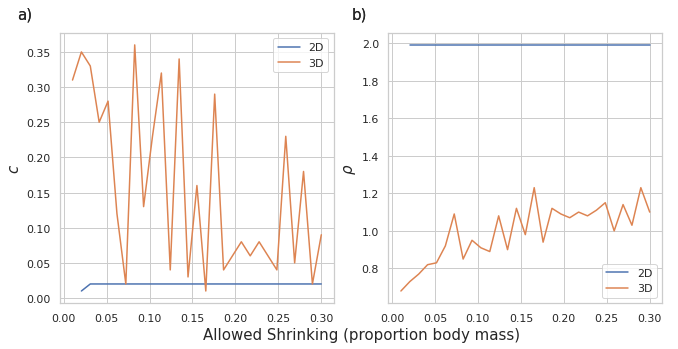

In [47]:
file_list = make_file_list(directory, ["shrinkage"], dimensions, LowResBoth1)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_LowResources_Shrink_exp1.pdf")

In [48]:
file_list

['../results/sensitivityLowResources_BothDims_metaexp1shrinkage2D.csv',
 '../results/sensitivityLowResources_BothDims_metaexp1shrinkage3D.csv']

In [49]:
show_data(file_list)

../results/sensitivityLowResources_BothDims_metaexp1shrinkage2D.csv


,c,rho,shrinkage,Xr,metabolic exponent
0,NaN,NaN,0.000000,0.11,1
1,NaN,NaN,0.010345,0.11,1
2,0.01,1.99,0.020690,0.11,1
3,0.02,1.99,0.031034,0.11,1
4,0.02,1.99,0.041379,0.11,1
5,0.02,1.99,0.051724,0.11,1
6,0.02,1.99,0.062069,0.11,1
7,0.02,1.99,0.072414,0.11,1
8,0.02,1.99,0.082759,0.11,1
9,0.02,1.99,0.093103,0.11,1


../results/sensitivityLowResources_BothDims_metaexp1shrinkage3D.csv


,c,rho,shrinkage,Xr,metabolic exponent
0,NaN,NaN,0.000000,0.11,1
1,0.31,0.68,0.010345,0.11,1
2,0.35,0.73,0.020690,0.11,1
3,0.33,0.77,0.031034,0.11,1
4,0.25,0.82,0.041379,0.11,1
5,0.28,0.83,0.051724,0.11,1
6,0.12,0.92,0.062069,0.11,1
7,0.02,1.09,0.072414,0.11,1
8,0.36,0.85,0.082759,0.11,1
9,0.13,0.95,0.093103,0.11,1


0

### 0.75 meta_exp 

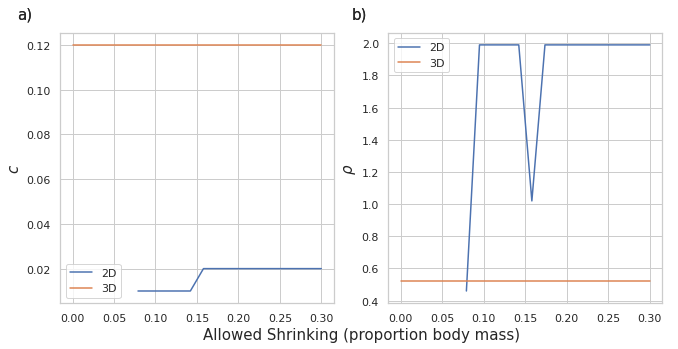

In [50]:
file_list = make_file_list(directory, ["shrinkage"], dimensions, LowResBoth075)
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_LowResources_Shrink_exp075.pdf")

## Very Low Resources

### 1

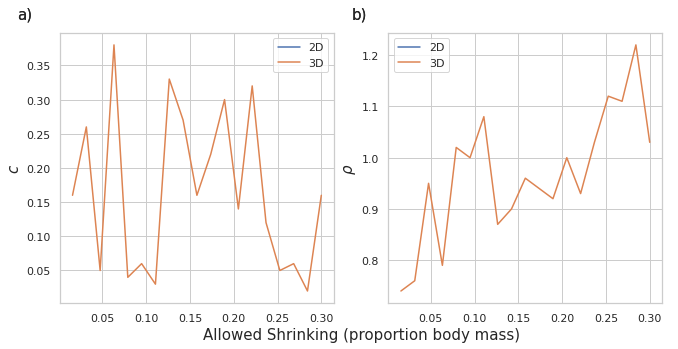

In [51]:
file_list = make_file_list(directory, ["shrinkage"], ["2D"], LowRes2D1)
file_list.append(make_file_list(directory, ["shrinkage"], ["3D"], LowRes3D1)[0])
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_VeryLowResources_Shrink_exp1.pdf")

In [52]:
file_list

['../results/sensitivityLowResources_2D_metaexp1shrinkage2D.csv',
 '../results/sensitivityLowResources_3D_metaexp1shrinkage3D.csv']

### 0.75

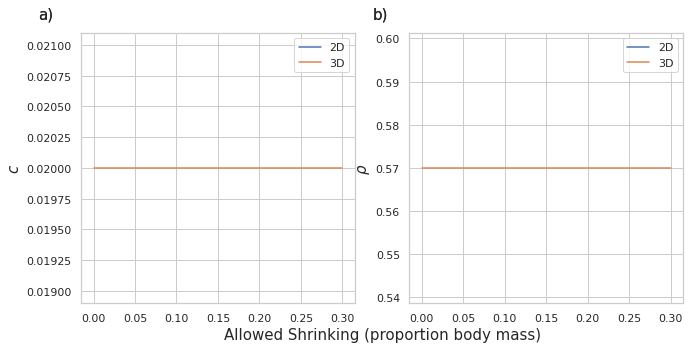

In [53]:
file_list = make_file_list(directory, ["shrinkage"], ["2D"], LowRes2D075)
file_list.append(make_file_list(directory, ["shrinkage"], ["3D"], LowRes3D075)[0])
plot_file_list(file_list, "Allowed Shrinking (proportion body mass)")
plt.savefig("../results/Sens_VeryLowResources_Shrink_exp075.pdf")

In [54]:
file_list

['../results/sensitivityLowResources_2D_metaexp075shrinkage2D.csv',
 '../results/sensitivityLowResources_3D_metaexp075shrinkage3D.csv']

# Other graphs

## log space scaling

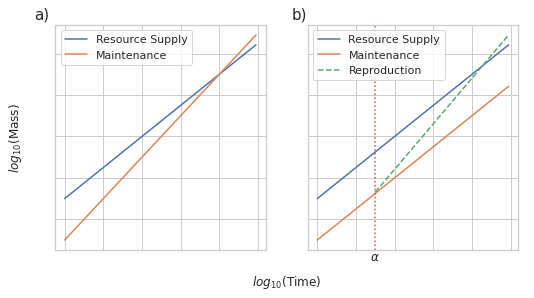

In [55]:
from numpy import arange, log10
import matplotlib.pyplot as plt
def func(x, constant, exponent):
    return constant + x*exponent
log_x = arange(0, 10, 0.1)
x = arange(0, 10, 0.1)
intake = func(x, 3, 0.75)
maintenance = func(x, 1, 1)
reproduction = func(x, 1, 1)

## plot OGM
fig = plt.figure(figsize=(a4_width, a4_width*0.5))
fig.add_subplot(121)
plt.text(0.09, 0.9, "a)", transform=fig.transFigure, fontsize=labelfont)
ax = plt.plot(x, intake, label="Resource Supply")
ax = plt.plot(x, maintenance, label="Maintenance")
plt.legend(loc="upper left")
plt.tick_params(labelcolor="none")

## plot allometric metabolism
rep_x = arange(3, 10, 0.1)
intake = func(x, 3, 0.75)
maintenance = func(x, 1, 0.75)
reproduction = func(rep_x, 0.01, 1.1)

fig.add_subplot(122)
plt.text(0.52, 0.9, "b)", transform=fig.transFigure, fontsize=labelfont)
ax = plt.plot(x, intake, label="Resource Supply")
ax = plt.plot(x, maintenance, label="Maintenance")
ax = plt.plot(rep_x, reproduction, label="Reproduction", linestyle='--')
ax = plt.axvline(3, linestyle='dotted', color="r")
plt.text(2.75,0,"$\\alpha$")
plt.legend(loc="upper left")
plt.tick_params(labelcolor="none")

## shared labels
fig.add_subplot(111, frameon=False)
plt.grid(False)
plt.tick_params(labelcolor="none")
plt.xlabel("$log_{10}$(Time)")
plt.ylabel("$log_{10}$(Mass)")
plt.savefig("../results/scalingplot.pdf")